## Name : PINKRAH NANA OFOSUHENE
## INDEX NUMBER : 4295120

<h1 style='font-size:3rem;color:red;'>ATMOSPHERICFIELD_WORK_ASSIGNMENT</h1>

In [408]:
#importing libraries

import xarray as xr
import matplotlib.pyplot as plt
from warnings import filterwarnings
filterwarnings('ignore')
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import matplotlib.colors as mcolors
import numpy as np
from matplotlib import cm
import cartopy.crs as ccrs
from cartopy import feature as cf

In [409]:
# opening multiple netcdf files at once 
ds_Madagascar=xr.open_dataset('ALL_PERSIANN_Madagascar.nc')

# removing all missing values
ds_Madagascar=ds_Madagascar.where(ds_Madagascar !=-99)
ds_Madagascar

<xarray.Dataset>
Dimensions:   (datetime: 3652, lat: 57, lon: 32)
Coordinates:
  * datetime  (datetime) datetime64[ns] 2001-01-01 2001-01-02 ... 2010-12-31
  * lon       (lon) float32 43.0 43.25 43.5 43.75 44.0 ... 50.0 50.25 50.5 50.75
  * lat       (lat) float32 -11.5 -11.75 -12.0 -12.25 ... -25.0 -25.25 -25.5
Data variables:
    crs       float64 1.0
    precip    (datetime, lat, lon) float32 nan nan nan nan ... nan nan nan nan
Attributes:
    CDI:          Climate Data Interface version 2.0.6 (https://mpimet.mpg.de...
    Conventions:  CF-1.6
    history:      Thu Apr 20 22:23:47 2023: cdo mergetime, PERSIANN_Madagasca...
    CDO:          Climate Data Operators version 2.0.6 (https://mpimet.mpg.de...

In [410]:
#checking datasets properties 
type(ds_Madagascar)

#checking shape
#ds_Madagascar.size

# checking the coordinates and dimensions 
ds_Madagascar.coords

#checking the attributes
ds_Madagascar.attrs

{'CDI': 'Climate Data Interface version 2.0.6 (https://mpimet.mpg.de/cdi)',
 'Conventions': 'CF-1.6',
 'history': 'Thu Apr 20 22:23:47 2023: cdo mergetime, PERSIANN_Madagascar_2023-04-13034236pm_2001.nc PERSIANN_Madagascar_2023-04-13034236pm_2002.nc PERSIANN_Madagascar_2023-04-13034236pm_2003.nc PERSIANN_Madagascar_2023-04-13034236pm_2004.nc PERSIANN_Madagascar_2023-04-13034236pm_2005.nc PERSIANN_Madagascar_2023-04-13034236pm_2006.nc PERSIANN_Madagascar_2023-04-13034236pm_2007.nc PERSIANN_Madagascar_2023-04-13034236pm_2008.nc PERSIANN_Madagascar_2023-04-13034236pm_2009.nc PERSIANN_Madagascar_2023-04-13034236pm_2010.nc ALL_PERSIANN_Madagascar_2023-04.nc',
 'CDO': 'Climate Data Operators version 2.0.6 (https://mpimet.mpg.de/cdo)'}

In [411]:
# checking variables available
ds_Madagascar.data_vars

Data variables:
    crs      float64 1.0
    precip   (datetime, lat, lon) float32 nan nan nan nan ... nan nan nan nan

In [412]:
# assigning data's to variable precip
da_Madagascar = ds_Madagascar.precip

In [413]:
# checking datasets type
type(ds_Madagascar)

xarray.core.dataset.Dataset

In [414]:
# checking data type
type(da_Madagascar)

xarray.core.dataarray.DataArray

In [415]:
coords_Madagascar=da_Madagascar.sel(lon=46.75, lat=-18.75, datetime=slice('2001','2010'))
Year=['2001','2002','2003','2004','2005','2006','2007','2008','2009','2010']
Months=['January','February','March','April','May','June','July','August','September','October','November','December']

## 1. MONTHLY RAINFALL TOTALS AND LONG TERM CLIMATOLOGIES

In [416]:
# MONTHLY RAINFALL TOTALS
Monthly_RR = coords_Madagascar.resample(datetime='1M').sum('datetime')
Monthly_RR.to_series().reset_index()

datetime      precip
0   2001-01-31  385.940002
1   2001-02-28  202.280029
2   2001-03-31  219.990005
3   2001-04-30   33.990002
4   2001-05-31    0.240000
..         ...         ...
115 2010-08-31    0.000000
116 2010-09-30    0.000000
117 2010-10-31   79.240005
118 2010-11-30  135.460007
119 2010-12-31  282.790009

[120 rows x 2 columns]

In [417]:
# Checking the maximum amount of rainfall
Monthly_RR.max()

<xarray.DataArray 'precip' ()>
array(526.01000977)
Coordinates:
    lon      float32 46.75
    lat      float32 -18.75

In [418]:
#locating the date of the maximum amount of rainfall
Monthly_RR.tail(50).to_series().reset_index()

datetime      precip
0  2006-11-30  203.540009
1  2006-12-31  325.410004
2  2007-01-31  526.010010
3  2007-02-28  392.420013
4  2007-03-31  103.600006
5  2007-04-30   56.269997
6  2007-05-31    0.000000
7  2007-06-30    0.000000
8  2007-07-31    0.000000
9  2007-08-31    0.000000
10 2007-09-30    2.400000
11 2007-10-31   33.399998
12 2007-11-30  194.569992
13 2007-12-31  227.460007
14 2008-01-31  175.369995
15 2008-02-29  228.799988
16 2008-03-31   56.109997
17 2008-04-30   22.260000
18 2008-05-31    0.420000
19 2008-06-30    0.000000
20 2008-07-31    0.000000
21 2008-08-31    0.690000
22 2008-09-30    7.680000
23 2008-10-31   50.389996
24 2008-11-30  243.909988
25 2008-12-31  268.649994
26 2009-01-31  267.850006
27 2009-02-28   72.839996
28 2009-03-31  318.520020
29 2009-04-30   70.010002
30 2009-05-31    0.000000
31 2009-06-30    0.000000
32 2009-07-31    0.200000
33 2009-08-31    0.240000
34 2009-09-30    0.000000
35 2009-10-31   28.920000
36 2009-11-30   39.180000
37 2009-12-31  163.220001
38 2010-01-31  312.860016
39 2010-02-28  136.089996
40 2010-03-31  190.350006
41 2010-04-30   17.410000
42 2010-05-31    4.460000
43 2010-06-30    4.160000
44 2010-07-31    0.000000
45 2010-08-31    0.000000
46 2010-09-30    0.000000
47 2010-10-31   79.240005
48 2010-11-30  135.460007
49 2010-12-31  282.790009

In [419]:
# THEIR LONG TERM CLIMATOLOGIES 
Longterm_Climatology_RR= Monthly_RR.groupby('datetime.month').mean('datetime')
Longterm_Climatology_RR.to_series().reset_index()

month      precip
0       1  316.187042
1       2  201.019989
2       3  202.869003
3       4   33.124001
4       5   14.377001
5       6    0.439000
6       7    1.564000
7       8    0.093000
8       9    1.271000
9      10   37.140003
10     11  147.860992
11     12  287.916992

## 2. ANNUAL TOTALS AND AVERAGES ACROSS MADAGASCAR

In [420]:
# computing Annual Totals across Madagascar
Annual_Totals_RR = coords_Madagascar.groupby('datetime.year').sum('datetime')
Annual_Totals_RR.to_series().reset_index()

year       precip
0  2001  1171.099854
1  2002  1291.030029
2  2003  1199.890015
3  2004  1629.359863
4  2005  1297.670044
5  2006  1135.360107
6  2007  1536.130005
7  2008  1054.280029
8  2009   960.980042
9  2010  1162.819946

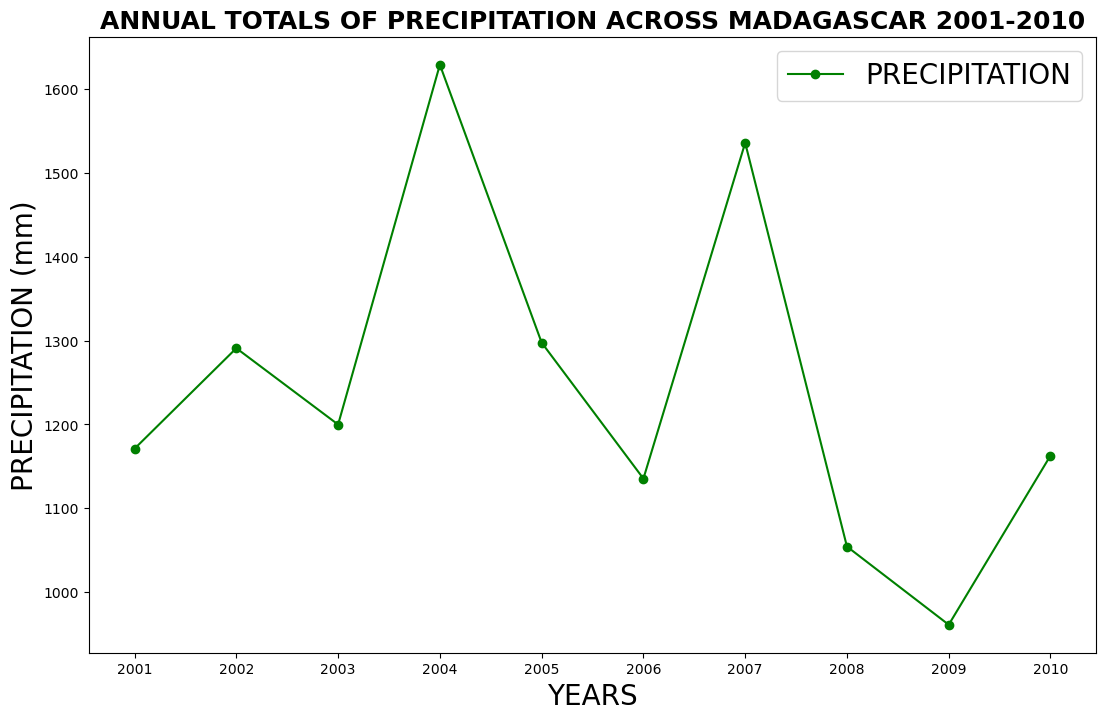

In [421]:
# ---------------Annual Totals Time series plot----------------
#Annual_Totals_RR.plot()
plt.plot(Year,Annual_Totals_RR,color = 'g',marker='o', label='PRECIPITATION')

# ENLARGING THE FIGURE SIZE
barwidth = 0.3
plt.rcParams['figure.figsize']=[13,7]

# locating the legend
plt.legend(loc='upper right', fontsize=20)

# naming the Y-axis
plt.ylabel('PRECIPITATION (mm)',fontsize=20)
# naming the Axis
plt.xlabel('YEARS', fontsize=20)

plt.title('ANNUAL TOTALS OF PRECIPITATION ACROSS MADAGASCAR 2001-2010', fontsize=18, color='black', fontweight='bold')
    
plt.savefig('2a.png')
plt.show()

# Annual Average

In [422]:
# Annual Average across Madagascar
Annual_Average_RR= coords_Madagascar.resample(datetime='1Y').mean('datetime')
Annual_Average_RR.to_series().reset_index()

datetime    precip
0 2001-12-31  3.208493
1 2002-12-31  3.537069
2 2003-12-31  3.287370
3 2004-12-31  4.451803
4 2005-12-31  3.555260
5 2006-12-31  3.110576
6 2007-12-31  4.208575
7 2008-12-31  2.888438
8 2009-12-31  2.632822
9 2010-12-31  3.185808

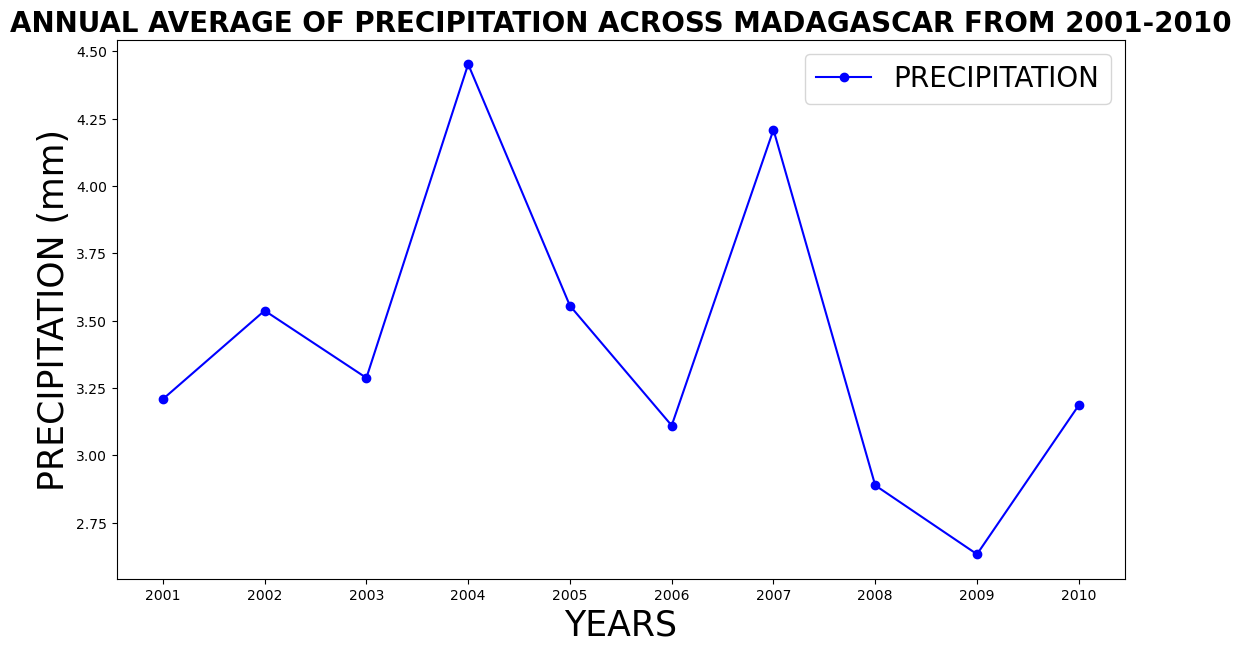

In [423]:
# Annual Average
#Annual_Average_RR= coords_Madagascar.groupby('datetime.year').mean('datetime')
plt.plot(Year,Annual_Average_RR,color = 'b',marker='o', label='PRECIPITATION')

barwidth = 0.3
plt.rcParams['figure.figsize']=[13,8]

# locating the legend
plt.legend(loc='upper right', fontsize=20)

# naming the Y-axis
plt.ylabel('PRECIPITATION (mm)', fontsize=25)
# naming the X Axis
plt.xlabel('YEARS', fontsize=25)
plt.title('ANNUAL AVERAGE OF PRECIPITATION ACROSS MADAGASCAR FROM 2001-2010', fontsize=20, color='black',fontweight='bold')
plt.savefig('2b.png')
plt.show()

## 3. COMPUTING THE NUMBER OF DRY (RR<1mm) and WET (RR>1mm)days(PER MONTH and PER YEAR)

In [424]:
Monthly_RR2 = coords_Madagascar.groupby('datetime.month').count('datetime')
Monthly_RR2.to_series().reset_index()

month  precip
0       1     310
1       2     282
2       3     309
3       4     300
4       5     310
5       6     300
6       7     310
7       8     310
8       9     300
9      10     310
10     11     300
11     12     310

# MONTHLY SPATIAL PLOT # COMPUTING THE NUMBER OF DRY (RR<1mm) AND WET (RR>1mm)

In [425]:
#computing the number of dry PER MONTH
#selecting precipitation RR<1mm
dry_CRR= da_Madagascar.where(da_Madagascar <1).sel(lon=46.75, lat=-18.75, datetime=slice('2001','2010'))
dry_CRR=dry_CRR.where(dry_CRR !=-99)

dry_cmon=dry_CRR.groupby('datetime.month').count('datetime')
dry_cmon.to_series().reset_index()

month  precip
0       1      75
1       2     104
2       3     155
3       4     240
4       5     296
5       6     299
6       7     308
7       8     310
8       9     296
9      10     248
10     11     153
11     12      85

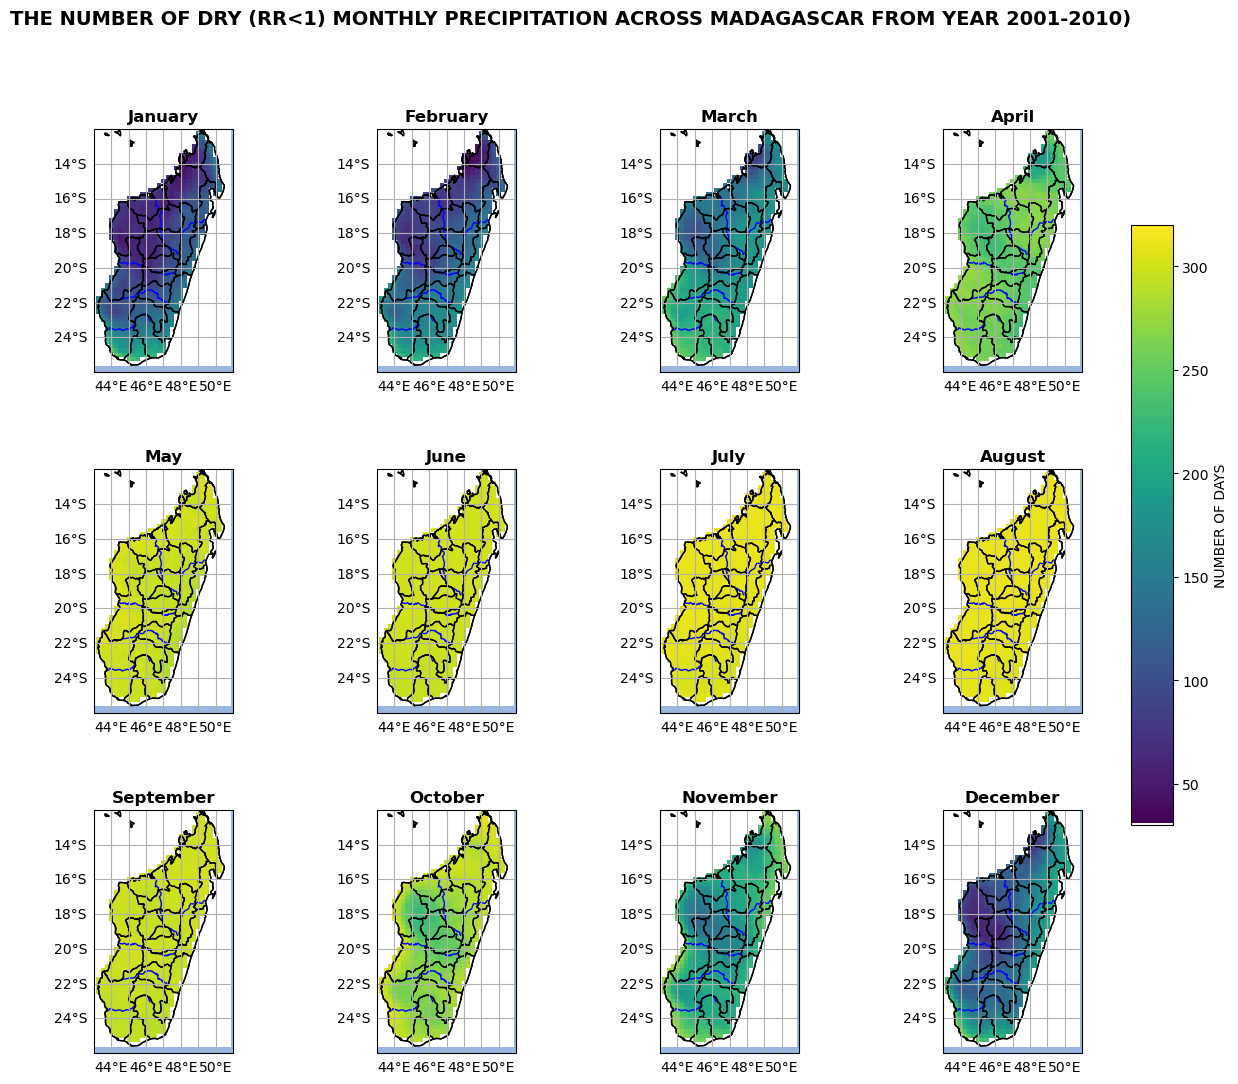

In [426]:
# SPATIAL PLOTS FOR THE NUMBER OF DRY (RR<1mm)----------------MONTHLY--------
#computing the number of dry PER MONTH
#selecting precipitation <1mm
dry_RR= da_Madagascar.where(da_Madagascar <1)
dry_mon=dry_RR.groupby('datetime.month').count('datetime')
dry_mon


fig, axes = plt.subplots(3,4,figsize=(14, 12), subplot_kw={'projection': ccrs.PlateCarree()})
ax = axes.flatten()
for i, v in enumerate(ax):
     #ADDING FEATURES
    ax[i].coastlines(resolution='10m')
    ax[i].add_feature(cf.BORDERS)
    ax[i].add_feature(cf.LAND)
    ax[i].add_feature(cf.RIVERS, color='b')
    ax[i].add_feature(cf.STATES)
    ax[i].add_feature(cf.OCEAN)
    ax[i].set_title(Months[i], fontweight='bold')
    ax[i].set_extent ([43,51,-12,-26])
    cs = ax[i].pcolormesh(dry_mon['lon'],dry_mon['lat'], dry_mon[i], cmap=new_map, vmax=320,vmin=30)
    cmap = plt.get_cmap('viridis')
    # modify colormap
    colors = cmap(np.arange(cmap.N))
    colors[0] = np.array([1.0, 1.0, 1.0, 1.0]) 
    new_map = mcolors.LinearSegmentedColormap.from_list('viridis', colors)
    grid=ax[i].gridlines()
    grid.xlabels_bottom=True; grid.ylabels_left=True;
    grid.xformatter=LONGITUDE_FORMATTER
    grid.yformatter=LATITUDE_FORMATTER
    plt.subplots_adjust(wspace=0.2,hspace=0.4)
    fig.suptitle('THE NUMBER OF DRY (RR<1) MONTHLY PRECIPITATION ACROSS MADAGASCAR FROM YEAR 2001-2010)', fontsize=14, fontweight='bold')
cbar = fig.add_axes([0.9, 0.3, 0.03, 0.5])
fig.colorbar(cs,cax=cbar, orientation='vertical',label='NUMBER OF DAYS')
plt.savefig('3.png')

In [427]:
# COMPUTING THE NUMBER FOR WET (RR>1mm) PER MONTH----------------MONTHLY----------
#selecting precipitation >1mm
wet_CRR= da_Madagascar.where(da_Madagascar >=1).sel(lon=46.75,lat=-18.75, datetime=slice('2001','2010'))
wet_CRR=wet_CRR.where(wet_CRR !=-99)
wet_CRR
wet_cmon=wet_CRR.groupby('datetime.month').count('datetime')
wet_cmon.to_series().reset_index()

month  precip
0       1     235
1       2     178
2       3     154
3       4      60
4       5      14
5       6       1
6       7       2
7       8       0
8       9       4
9      10      62
10     11     147
11     12     225

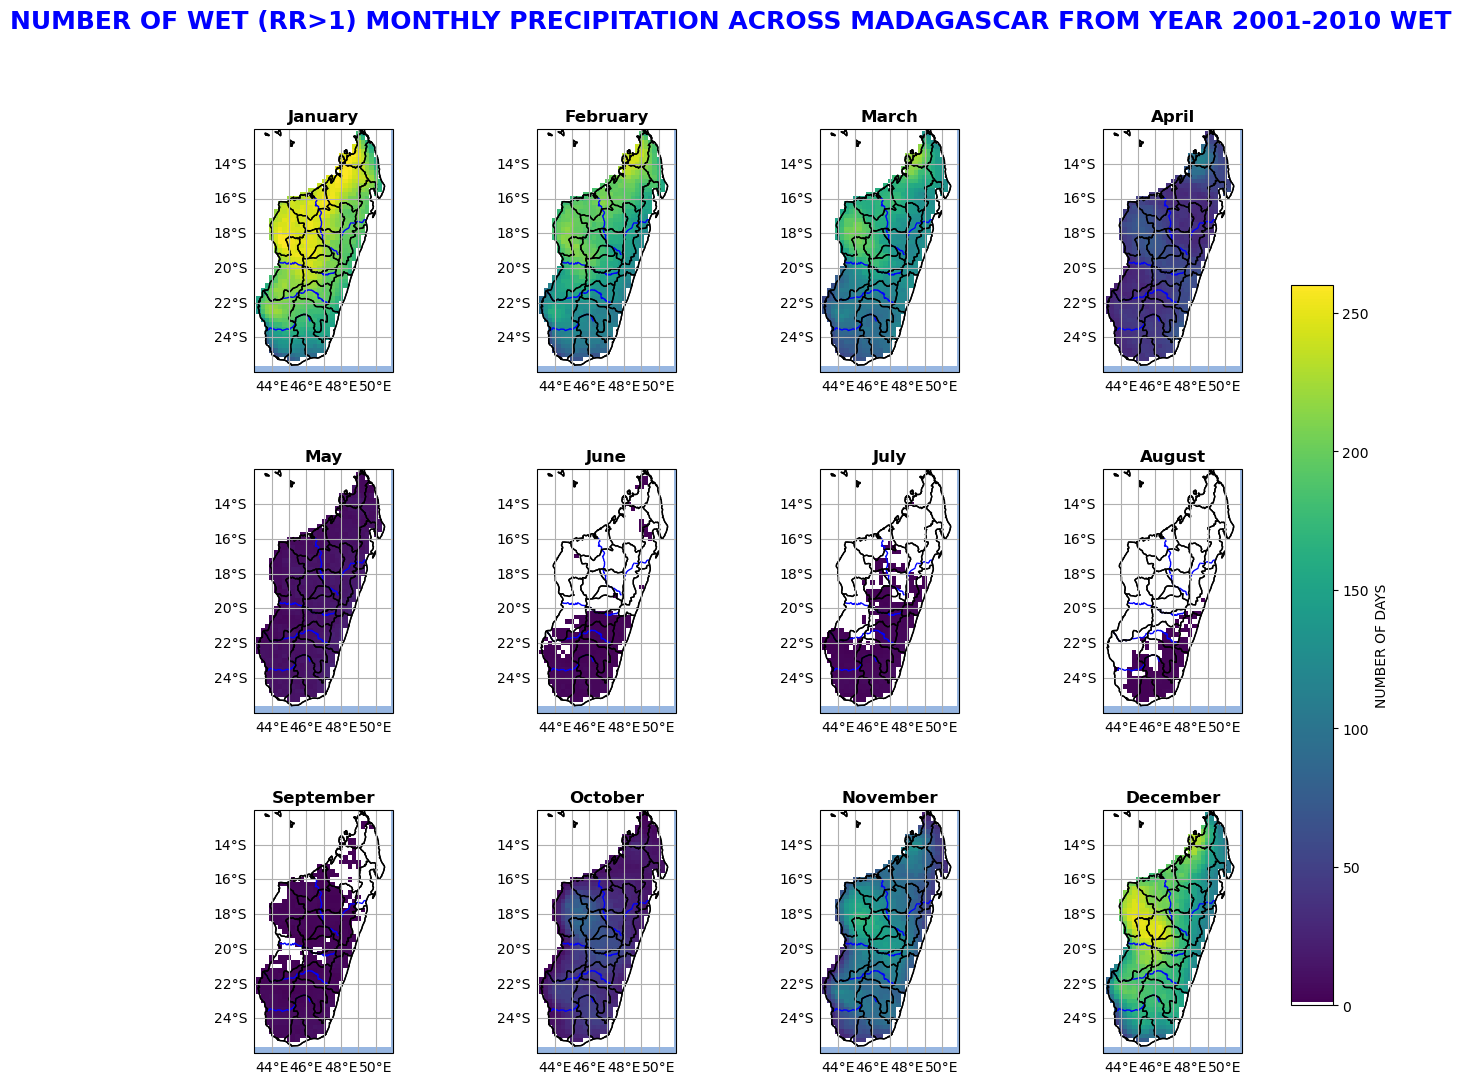

In [428]:
# SPATIAL PLOTS FOR THE NUMBER OF WET (RR>=1mm)----------------MONTHLY--------

#selecting precipitation >1mm
wet_RR= da_Madagascar.where(da_Madagascar >=1)
wet_mon=wet_RR.groupby('datetime.month').count('datetime')

fig, axes = plt.subplots(3,4,figsize=(14, 12), subplot_kw={'projection': ccrs.PlateCarree()})
ax = axes.flatten()
for i, v in enumerate(ax):
     #ADDING FEATURES
    ax[i].coastlines(resolution='10m')
    ax[i].add_feature(cf.BORDERS)
    ax[i].add_feature(cf.LAND)
    ax[i].add_feature(cf.RIVERS, color='b')
    ax[i].add_feature(cf.STATES)
    ax[i].add_feature(cf.OCEAN)
    ax[i].set_title(Months[i], fontweight='bold')
    ax[i].set_extent ([43,51,-12,-26])
    cs = ax[i].pcolormesh(wet_mon['lon'],wet_mon['lat'], wet_mon[i], cmap=new_map, vmax=260,vmin=0)
    # modify colormap
    colors = cmap(np.arange(cmap.N))
    colors[0] = np.array([1.0, 1.0, 1.0, 1.0]) 
    new_map = mcolors.LinearSegmentedColormap.from_list('viridis', colors)
    grid=ax[i].gridlines()
    grid.xlabels_bottom=True; grid.ylabels_left=True;
    grid.xformatter=LONGITUDE_FORMATTER
    grid.yformatter=LATITUDE_FORMATTER
    plt.subplots_adjust(wspace=0.2,hspace=0.4)
    fig.suptitle('NUMBER OF WET (RR>1) MONTHLY PRECIPITATION ACROSS MADAGASCAR FROM YEAR 2001-2010 WET', fontsize=18, color='b',fontweight='bold')
cbar = fig.add_axes([0.9, 0.15, 0.03, 0.6])
fig.colorbar(cs,cax=cbar, orientation='vertical',label='NUMBER OF DAYS')
plt.savefig('3b.png')

# ANNUAL SPATIAL PLOT # COMPUTING THE NUMBER OF WET (RR>=1mm)

In [429]:
#-----------COMPUTING THE NUMBER OF DRY (RR<1mm) PER ANNUAL-------------
#selecting precipitation <1mm
Annual_dry_RR= da_Madagascar.where(da_Madagascar <1).sel(lon=46.75, lat=-18.75, datetime=slice('2001','2010'))
Annual_dry_RR
Annual_cdry=Annual_dry_RR.groupby('datetime.year').count('datetime')
Annual_cdry.to_series().reset_index()

year  precip
0  2001     258
1  2002     245
2  2003     247
3  2004     254
4  2005     265
5  2006     264
6  2007     246
7  2008     265
8  2009     263
9  2010     262

In [430]:
# COMPUTING THE NUMBER OF WET (RR>=1mm)------ANNUAL
#selecting precipitation >=1mm
Annual_wet_RR= da_Madagascar.where(da_Madagascar >=1).sel(lon=46.75, lat=-18.75, datetime=slice('2001','2010'))
Annual_wet_RR
# GROUPING data in years
Annual_cwet=Annual_wet_RR.groupby('datetime.year').count('datetime')
Annual_cwet.to_series().reset_index()

year  precip
0  2001     107
1  2002     120
2  2003     118
3  2004     112
4  2005     100
5  2006     101
6  2007     119
7  2008     100
8  2009     102
9  2010     103

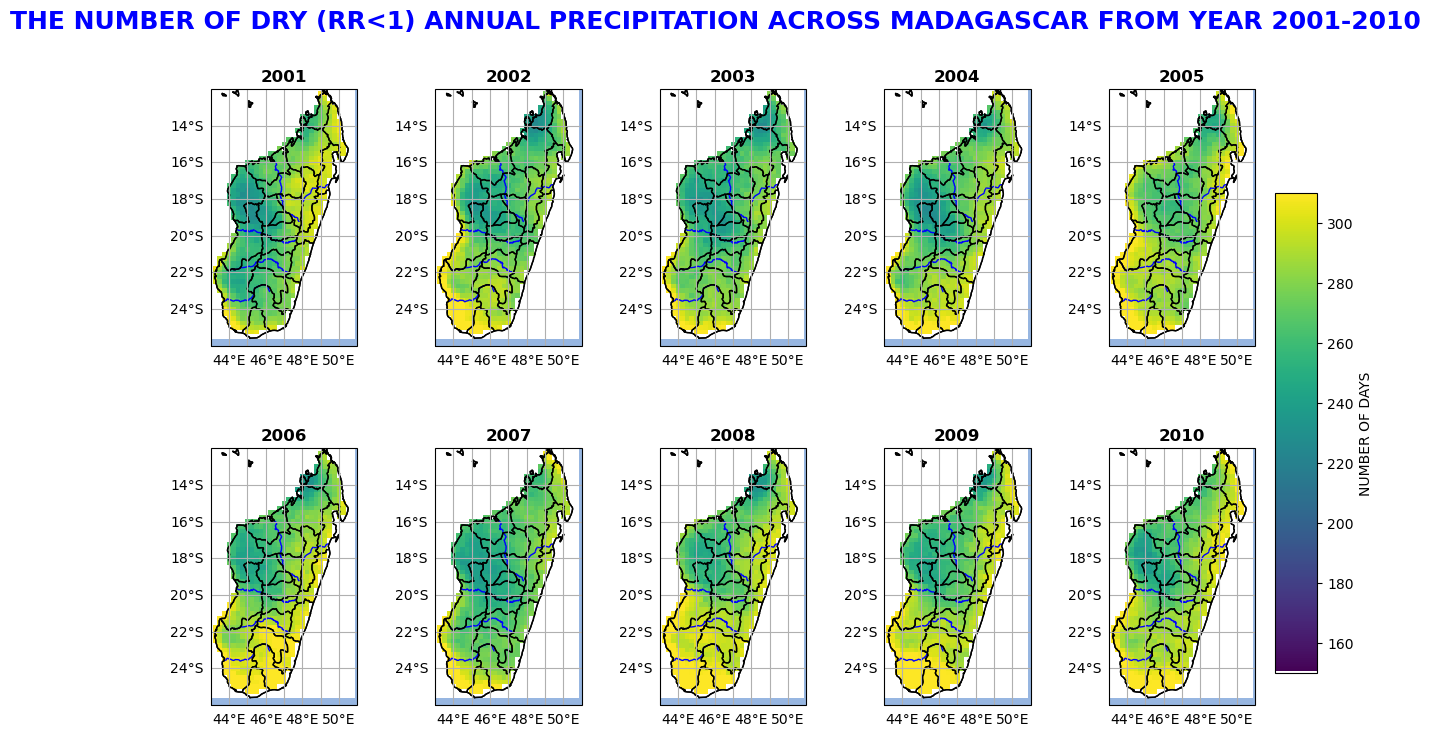

In [431]:
# SPATIAL PLOTS FOR THE NUMBER OF DRY (RR<1mm)----------------ANNUAL--------
#selecting precipitation <1mm
Annual_dry_RR= da_Madagascar.where(da_Madagascar <1)
Annual_dry=Annual_dry_RR.groupby('datetime.year').count('datetime')
Annual_dry

fig, axes = plt.subplots(2,5,figsize=(14, 8), subplot_kw={'projection': ccrs.PlateCarree()})
ax = axes.flatten()
for i, v in enumerate(ax):
     #ADDING FEATURES
    ax[i].coastlines(resolution='10m')
    ax[i].add_feature(cf.BORDERS)
    ax[i].add_feature(cf.LAND)
    ax[i].add_feature(cf.RIVERS, color='b')
    ax[i].add_feature(cf.STATES)
    ax[i].add_feature(cf.OCEAN)
    ax[i].set_title(Year[i], fontweight='bold')
    ax[i].set_extent ([43,51,-12,-26])
    cs = ax[i].pcolormesh(Annual_dry['lon'],Annual_dry['lat'], Annual_dry[i], cmap=new_map, vmax=310,vmin=150)
    # modify colormap
    colors = cmap(np.arange(cmap.N))
    colors[0] = np.array([1.0, 1.0, 1.0, 1.0]) 
    new_map = mcolors.LinearSegmentedColormap.from_list('viridis', colors)
    grid=ax[i].gridlines()
    grid.xlabels_bottom=True; grid.ylabels_left=True;
    grid.xformatter=LONGITUDE_FORMATTER
    grid.yformatter=LATITUDE_FORMATTER
    plt.subplots_adjust(wspace=0.2,hspace=0.4)
    fig.suptitle('THE NUMBER OF DRY (RR<1) ANNUAL PRECIPITATION ACROSS MADAGASCAR FROM YEAR 2001-2010', fontsize=18, color='b',fontweight='bold')
cbar = fig.add_axes([0.9, 0.15, 0.03, 0.6])
fig.colorbar(cs,cax=cbar, orientation='vertical',label='NUMBER OF DAYS')
plt.savefig('3c.png')

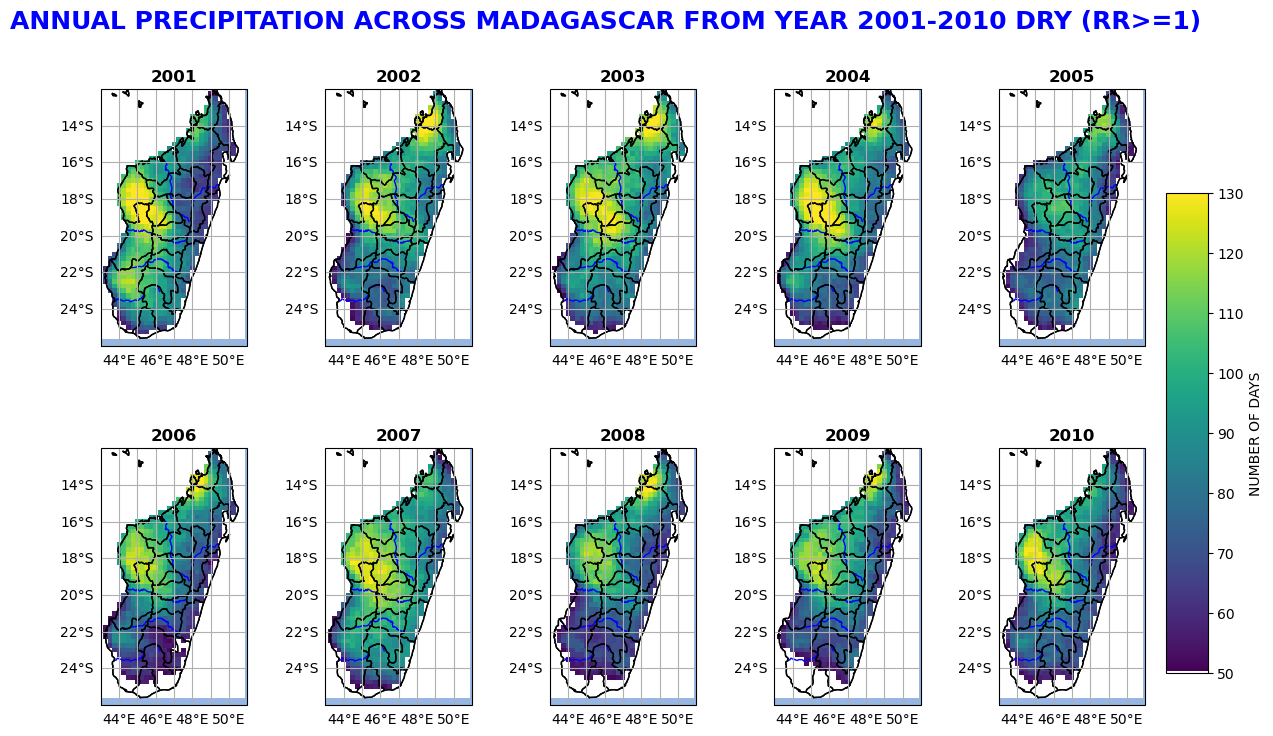

In [432]:
# SPATIAL PLOTS FOR THE NUMBER OF WET (RR>=1mm)----------------ANNUAL--------
#selecting precipitation >1mm
Annual_wet_RR= da_Madagascar.where(da_Madagascar >=1)
Annual_wet_RR
# GROUPING data in years
Annual_wet=Annual_wet_RR.groupby('datetime.year').count('datetime')
Annual_wet

fig, axes = plt.subplots(2,5,figsize=(14, 8), subplot_kw={'projection': ccrs.PlateCarree()})
ax = axes.flatten()
for i, v in enumerate(ax):
     #ADDING FEATURES
    ax[i].coastlines(resolution='10m')
    ax[i].add_feature(cf.BORDERS)
    ax[i].add_feature(cf.LAND)
    ax[i].add_feature(cf.RIVERS, color='b')
    ax[i].add_feature(cf.STATES)
    ax[i].add_feature(cf.OCEAN)
    ax[i].set_title(Year[i], fontweight='bold')
    ax[i].set_extent ([43,51,-12,-26])
    cs = ax[i].pcolormesh(Annual_wet['lon'],Annual_wet['lat'], Annual_wet[i], cmap=new_map, vmax=130,vmin=50)
    colors = cmap(np.arange(cmap.N))
    colors[0] = np.array([1.0, 1.0, 1.0, 1.0]) 
    new_map = mcolors.LinearSegmentedColormap.from_list('viridis', colors)
    grid=ax[i].gridlines()
    grid.xlabels_bottom=True; grid.ylabels_left=True;
    grid.xformatter=LONGITUDE_FORMATTER
    grid.yformatter=LATITUDE_FORMATTER
    plt.subplots_adjust(wspace=0.2,hspace=0.4)
    fig.suptitle('ANNUAL PRECIPITATION ACROSS MADAGASCAR FROM YEAR 2001-2010 DRY (RR>=1)', fontsize=18, color='b',fontweight='bold')
cbar = fig.add_axes([0.9, 0.15, 0.03, 0.6])
fig.colorbar(cs,cax=cbar, orientation='vertical',label='NUMBER OF DAYS')
plt.savefig('3d.png')

## MONTHLY TIMESERIES PLOT # COMPUTING THE NUMBER OF DRY (RR<1mm) AND WET (RR>1mm)

## MONTHLY TIMESERIES FOR FOR WET AND DRY

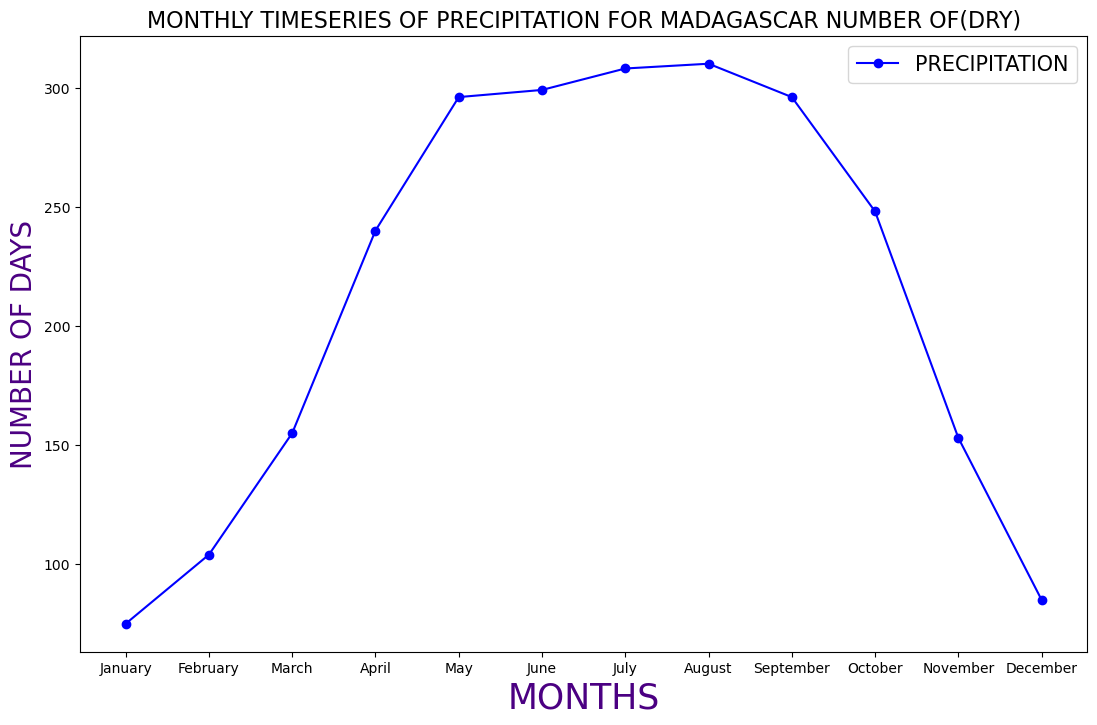

In [433]:
#computing the number of dry PER MONTH TIMESERIES
#computing the number of dry PER MONTH
#selecting precipitation RR<1mm
dry_CRR= da_Madagascar.where(da_Madagascar <1).sel(lon=46.75, lat=-18.75, datetime=slice('2001','2010'))
dry_mon=dry_CRR.where(dry_CRR !=-99)

dry_RR=dry_CRR.groupby('datetime.month').count('datetime')
dry_RR
Months=['January','February','March','April','May','June','July','August','September','October','November','December']
plt.plot(Months,dry_RR, marker='o',color='b',label='PRECIPITATION')
plt.legend(fontsize=15)
plt.title('MONTHLY TIMESERIES OF PRECIPITATION FOR MADAGASCAR NUMBER OF(DRY)', fontsize='16', color='black')
# naming the Y-axis
plt.ylabel('NUMBER OF DAYS', fontsize=20, color='indigo')
# naming the X Axis
plt.xlabel('MONTHS', fontsize=25, color='indigo')
plt.savefig('3e.png')
plt.show()

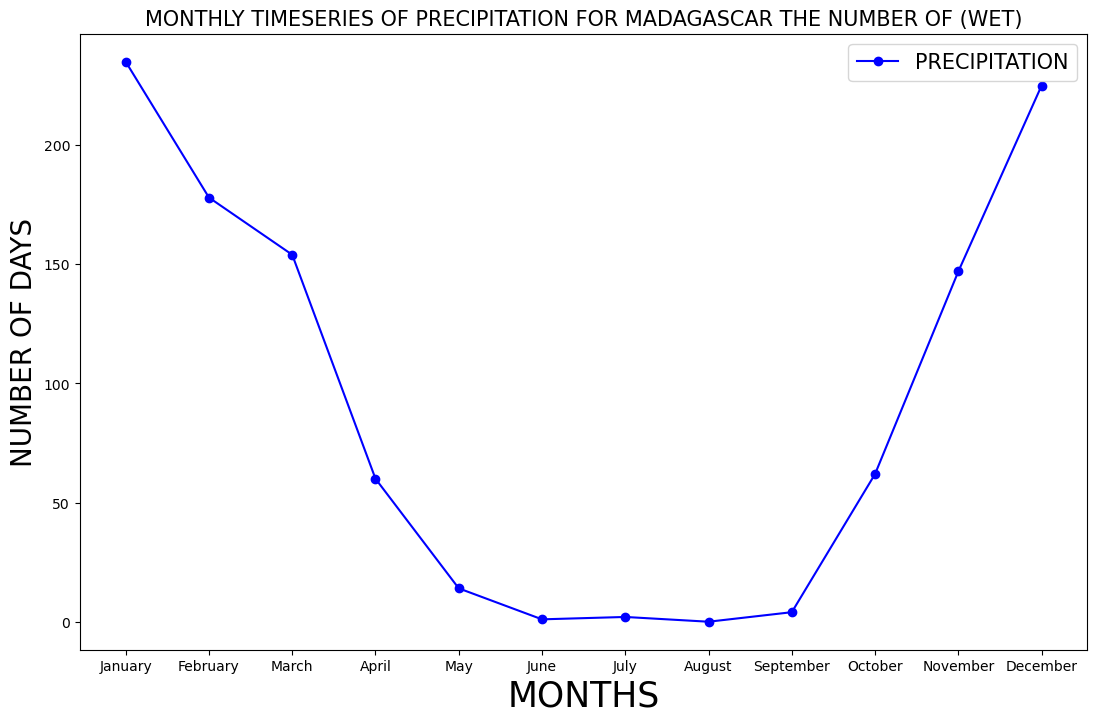

In [434]:

# TIMESERIES PLOT FOR WET (RR>1mm) PER MONTH----------------MONTHLY----------
#selecting precipitation >1mm
wet_CRR= da_Madagascar.where(da_Madagascar >=1).sel(lon=46.75, lat=-18.75, datetime=slice('2001','2010'))
wet_CRR
wet_cmon=wet_CRR.groupby('datetime.month').count('datetime')
plt.plot(Months,wet_cmon, marker='o',color='b',label='PRECIPITATION')
plt.legend(fontsize=15)

plt.title('MONTHLY TIMESERIES OF PRECIPITATION FOR MADAGASCAR THE NUMBER OF (WET)', fontsize='15', color='black')
# naming the Y-axis
plt.ylabel('NUMBER OF DAYS', fontsize=20, color='black')
# naming the X Axis
plt.xlabel('MONTHS', fontsize=25, color='black')
plt.savefig('3f.png')
plt.show()

## ANNUAL TIMESERIES PLOT # COMPUTING THE NUMBER OF DRY (RR<1mm) AND WET (RR>1mm)

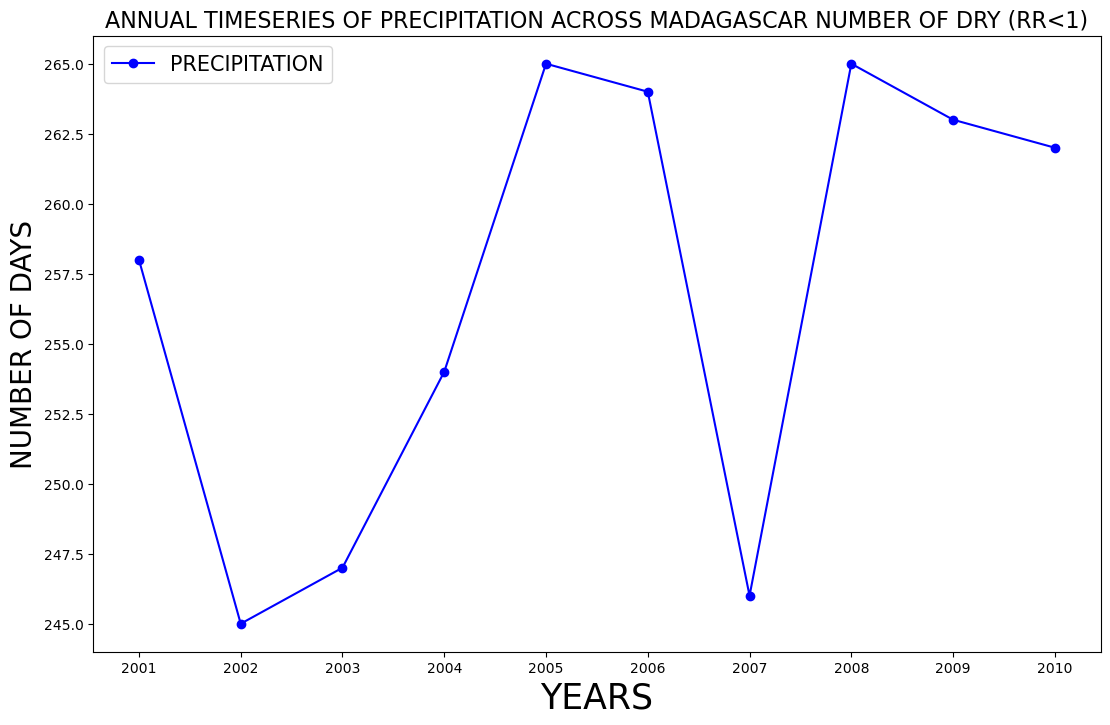

In [435]:
# COMPUTING THE NUMBER OF DRY (RR<1mm)-----MONTHLY TIMESERIES----
#selecting precipitation <1mm
plt.plot(Year,Annual_cdry, marker='o',color='b',label='PRECIPITATION')

plt.legend(fontsize=15)
plt.title('ANNUAL TIMESERIES OF PRECIPITATION ACROSS MADAGASCAR NUMBER OF DRY (RR<1)', fontsize='16', color='black')
# naming the Y-axis
plt.ylabel('NUMBER OF DAYS', fontsize=20, color='black')
# naming the X Axis
plt.xlabel('YEARS', fontsize=25, color='black')
plt.savefig('3g.png')
plt.show()

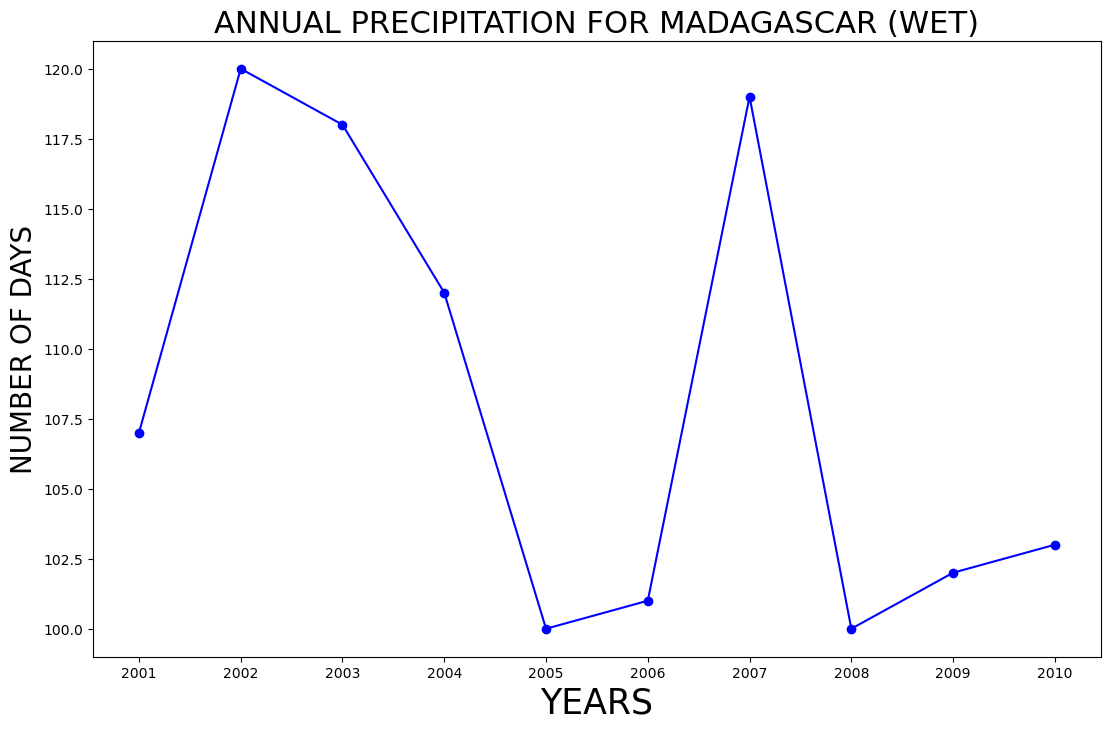

In [436]:
# COMPUTING THE NUMBER OF DRY (RR>=1mm) MONTHLY
#selecting precipitation >1mm
plt.plot(Year,Annual_cwet, marker='o',color='b',label='PRECIPITATION')
plt.title('ANNUAL PRECIPITATION FOR MADAGASCAR (WET)', fontsize='22', color='black')
# naming the Y-axis
plt.ylabel('NUMBER OF DAYS', fontsize=20, color='black')
# naming the X Axis
plt.xlabel('YEARS', fontsize=25, color='black')
plt.savefig('3h.png')
plt.show()

## 4. EXTREME RAINFALL FOR RR>10mm and RR>20mm

### MONTHLY TIMESERIES PLOT 

In [437]:
# COMPUTING THE NUMBER OF EXTREME RAINFALL (RR>10mm)-----MONTHLY TIMESERIES----
#selecting precipitation >10mm
dry_RR= da_Madagascar.where(da_Madagascar >10).sel(lon=46.75, lat=-18.75, datetime=slice('2001','2010'))
dry_RR
dry1=dry_RR.groupby('datetime.month').count('datetime')
dry1.to_series().reset_index()

month  precip
0       1     123
1       2      73
2       3      65
3       4       9
4       5       3
5       6       0
6       7       1
7       8       0
8       9       0
9      10      11
10     11      51
11     12     106

In [438]:
#selecting precipitation >20mm----------monthly--
dry_RR= da_Madagascar.where(da_Madagascar >20).sel(lon=46.75, lat=-18.75, datetime=slice('2001','2010'))
dry2=dry_RR.groupby('datetime.month').count('datetime')
dry2.to_series().reset_index()

month  precip
0       1      54
1       2      33
2       3      35
3       4       1
4       5       1
5       6       0
6       7       0
7       8       0
8       9       0
9      10       1
10     11      21
11     12      42

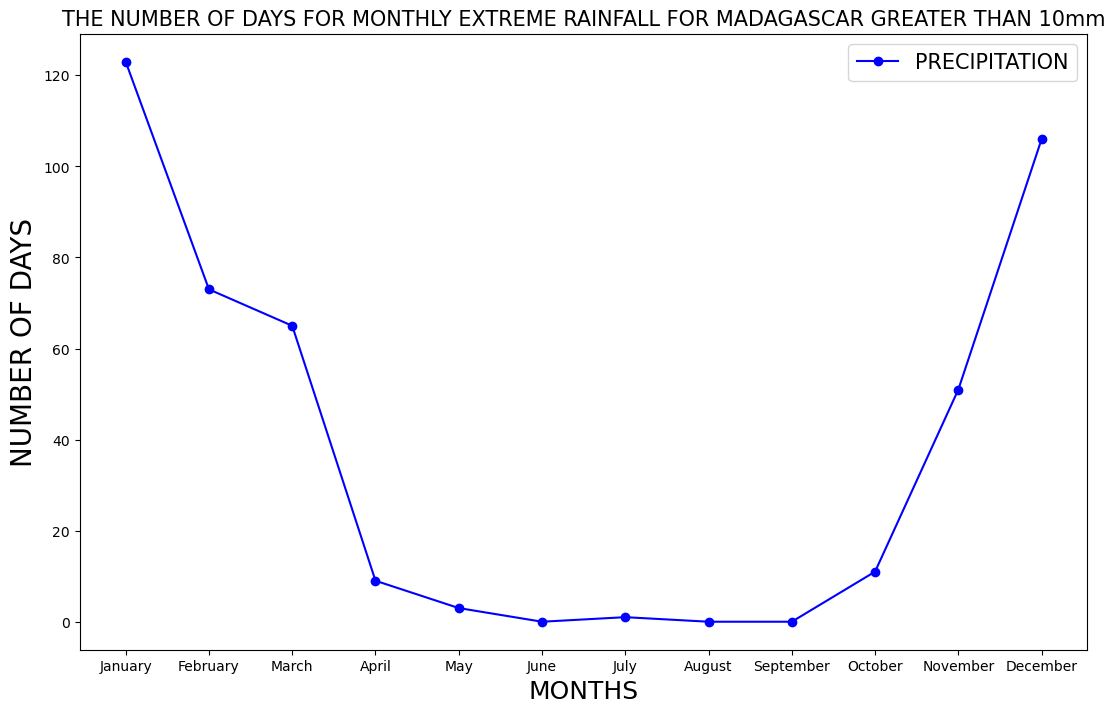

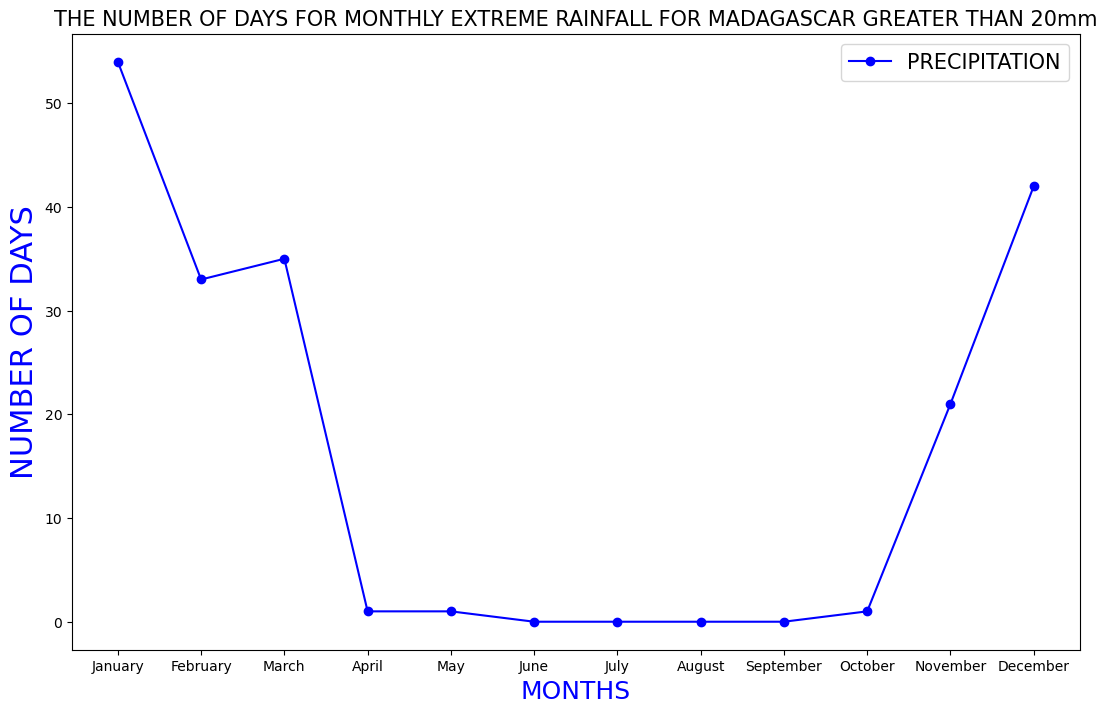

In [439]:
# COMPUTING THE NUMBER OF DRY (RR>10mm)-----MONTHLY TIMESERIES----
#selecting precipitation >10mm
plt.plot(Months,dry1, marker='o',color='b',label='PRECIPITATION')
plt.legend(fontsize=15)
plt.title('THE NUMBER OF DAYS FOR MONTHLY EXTREME RAINFALL FOR MADAGASCAR GREATER THAN 10mm', fontsize='15', color='black')
# naming the Y-axis
plt.ylabel('NUMBER OF DAYS', fontsize=20, color='black')
# naming the X Axis
plt.xlabel('MONTHS', fontsize=18, color='black')
plt.savefig('4a.png')
plt.show()

#----------- MONTHLY EXTREME RAINFALL >20
#selecting precipitation >20mm
#dry2=da_Madagascar.where(da_Madagascar >20).sel(lon=46.75, lat=-18.75, datetime=slice('2001','2010'))
plt.title('THE NUMBER OF DAYS FOR MONTHLY EXTREME RAINFALL FOR MADAGASCAR GREATER THAN 20mm', fontsize='15', color='black')
plt.plot(Months,dry2, marker='o',color='b',label='PRECIPITATION')
plt.legend(fontsize=15)
# naming the Y-axis
plt.ylabel('NUMBER OF DAYS', fontsize=22, color='b')
# naming the X Axis
plt.xlabel('MONTHS', fontsize=18, color='b')
plt.savefig('4b.png')

###  ANNUAL TIMESERIES PLOT 

In [440]:
# COMPUTING ANNUAL EXTREME (RR>10mm)-----ANNUAL TIMESERIES----
#selecting precipitation >10mm
dry_RR= da_Madagascar.where(da_Madagascar >10).sel(lon=46.75, lat=-18.75, datetime=slice('2001','2010'))
dry_RR
extreme_RR=dry_RR.groupby('datetime.year').count('datetime')
extreme_RR.to_series().reset_index()

year  precip
0  2001      45
1  2002      41
2  2003      40
3  2004      57
4  2005      48
5  2006      34
6  2007      58
7  2008      38
8  2009      37
9  2010      44

In [441]:
#selecting Extreme precipitation >20mm
dry_RR= da_Madagascar.where(da_Madagascar >20).sel(lon=46.75, lat=-18.75, datetime=slice('2001','2010'))
dry_RR
extreme_RR2=dry_RR.groupby('datetime.year').count('datetime')
extreme_RR2.to_series().reset_index()

year  precip
0  2001      18
1  2002      19
2  2003      20
3  2004      26
4  2005      22
5  2006      19
6  2007      23
7  2008      15
8  2009       9
9  2010      17

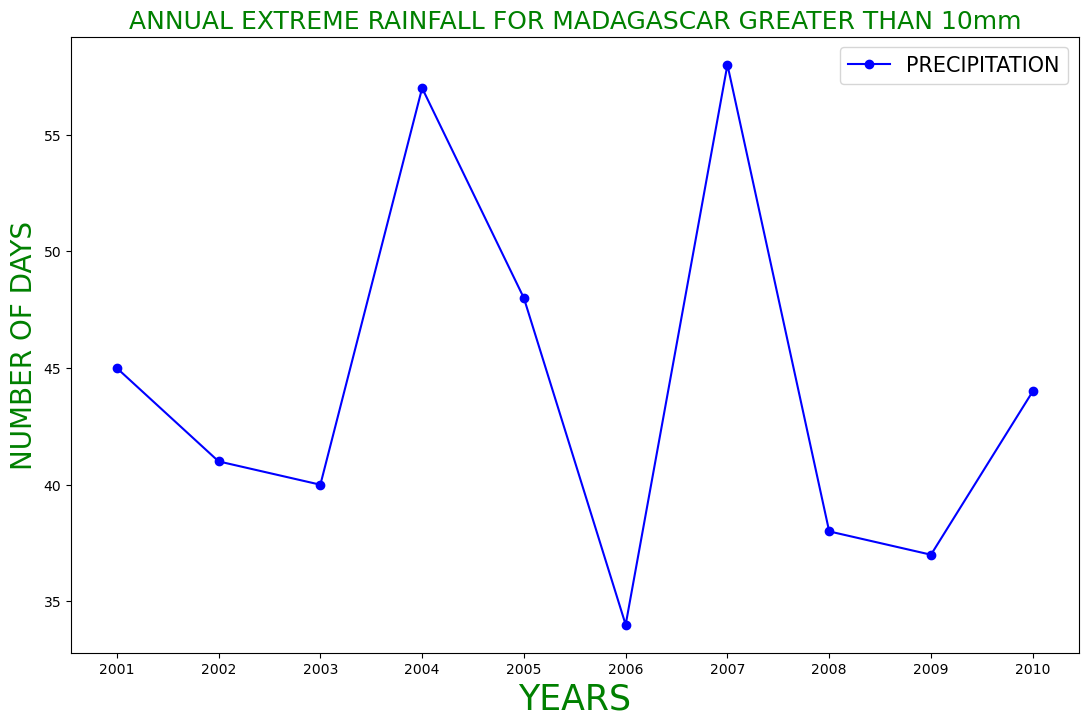

In [442]:
# ANNUAL  NUMBER OF DRY (RR>10mm)-----ANNUAL TIMESERIES----
plt.plot(Year,extreme_RR, marker='o',color='b',label='PRECIPITATION')
plt.legend(fontsize=15)
plt.title('ANNUAL EXTREME RAINFALL FOR MADAGASCAR GREATER THAN 10mm', fontsize='18', color='g')
# naming the Y-axis
plt.ylabel('NUMBER OF DAYS', fontsize=20, color='g')
# naming the X Axis
plt.xlabel('YEARS', fontsize=25, color='g')
plt.savefig('4c.png')
plt.show()

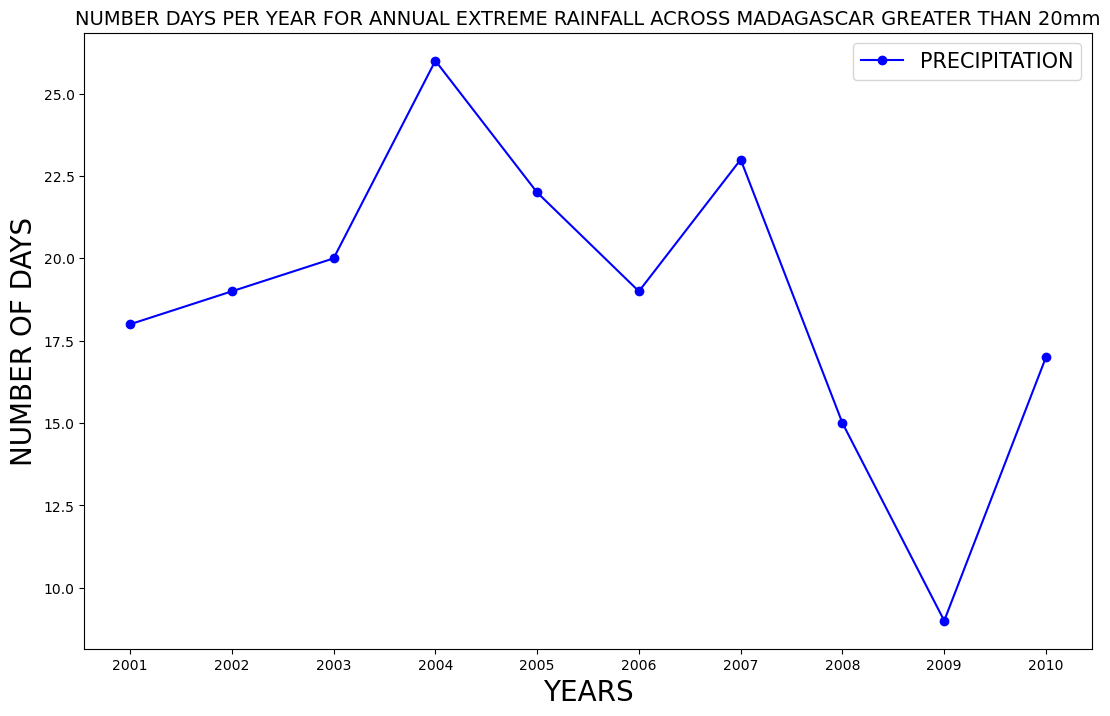

In [443]:
#------------- ANNUAL(RR>20)------------
plt.plot(Year,extreme_RR2, marker='o',color='b',label='PRECIPITATION')
plt.legend(fontsize=15)
plt.title('NUMBER DAYS PER YEAR FOR ANNUAL EXTREME RAINFALL ACROSS MADAGASCAR GREATER THAN 20mm', fontsize='14', color='black')
# naming the Y-axis
plt.ylabel('NUMBER OF DAYS', fontsize=20)
# naming the X Axis
plt.xlabel('YEARS', fontsize=20)
plt.savefig('4d.png')
plt.show()

# ANNUAL ANDMONTHLY SPATIAL PLOTS FOR EXTREME RAINFALL 

   # Monthly spatial plot

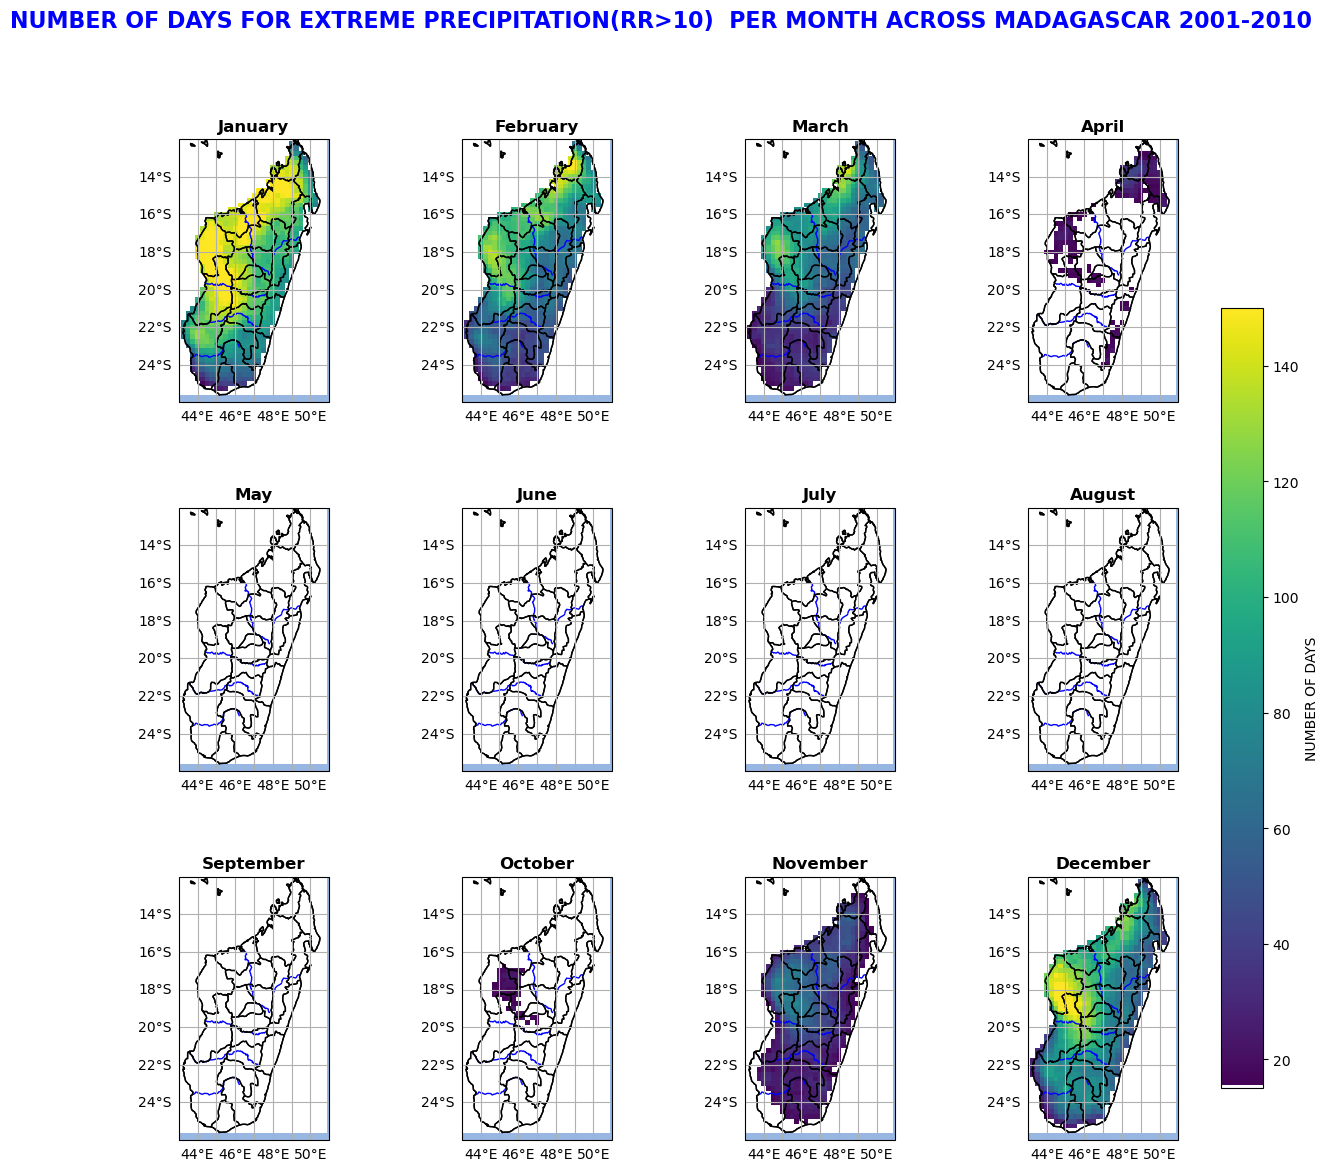

In [444]:
#--------------------MONTHLY SPATIAL FOR (RR>10)---
#selecting precipitation >10mm
Monthly_extreme_RR= da_Madagascar.where(da_Madagascar >10)
Monthly_extreme_RR

Monthly_extreme=Monthly_extreme_RR.groupby('datetime.month').count('datetime')
Monthly_extreme

fig, axes = plt.subplots(3,4,figsize=(14, 13), subplot_kw={'projection': ccrs.PlateCarree()})
ax = axes.flatten()
for i, v in enumerate(ax):
  
    #ADDING FEATURES
    ax[i].coastlines(resolution='10m')
    ax[i].add_feature(cf.BORDERS)
    ax[i].add_feature(cf.LAND)
    ax[i].add_feature(cf.RIVERS, color='b')
    ax[i].add_feature(cf.STATES)
    ax[i].add_feature(cf.OCEAN)
    ax[i].set_title(Months[i], fontweight='bold')
    ax[i].set_extent ([43,51,-12,-26])
    cs = ax[i].pcolormesh(Monthly_extreme['lon'],Monthly_extreme['lat'], Monthly_extreme[i], cmap=new_map, vmax=150,vmin=15)
    # modify colormap
    colors = cmap(np.arange(cmap.N))
    colors[0] = np.array([1.0, 1.0, 1.0, 1.0]) 
    new_map = mcolors.LinearSegmentedColormap.from_list('viridis', colors)
    grid=ax[i].gridlines()
    grid.xlabels_bottom=True; grid.ylabels_left=True;
    grid.xformatter=LONGITUDE_FORMATTER
    grid.yformatter=LATITUDE_FORMATTER
    plt.subplots_adjust(wspace=0.2,hspace=0.4)
    fig.suptitle('NUMBER OF DAYS FOR EXTREME PRECIPITATION(RR>10)  PER MONTH ACROSS MADAGASCAR 2001-2010', fontsize=16, color='b',fontweight='bold')
cbar = fig.add_axes([0.9, 0.15, 0.03, 0.6])
fig.colorbar(cs,cax=cbar, orientation='vertical',label='NUMBER OF DAYS')
plt.savefig('4e.png')

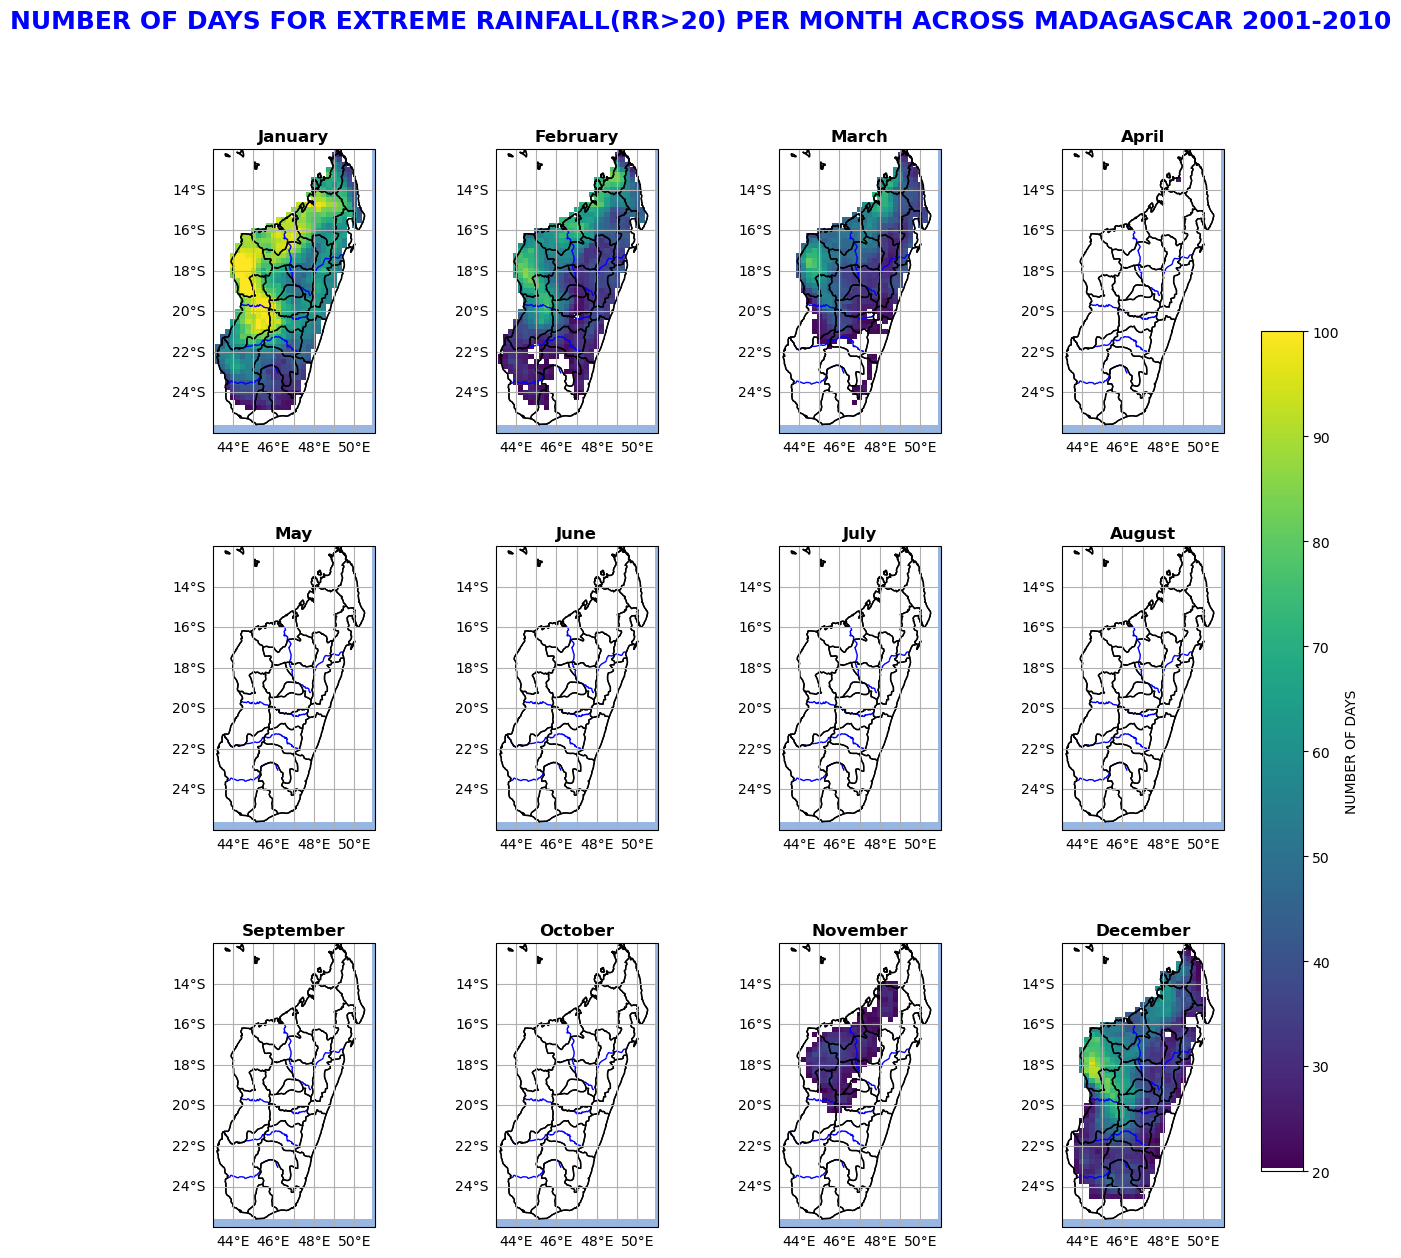

In [445]:
#--------------------MONTHLY SPATIAL PLOTS FOR (RR>20)---
#selecting precipitation >20mm
Monthly_extreme_RR= da_Madagascar.where(da_Madagascar >20)
Monthly_extreme_RR

Monthly_extreme2=Monthly_extreme_RR.groupby('datetime.month').count('datetime')
Monthly_extreme2

fig, axes = plt.subplots(3,4,figsize=(14, 14), subplot_kw={'projection': ccrs.PlateCarree()})
ax = axes.flatten()
for i, v in enumerate(ax):
  
    #ADDING FEATURES
    ax[i].coastlines(resolution='10m')
    ax[i].add_feature(cf.BORDERS)
    ax[i].add_feature(cf.LAND)
    ax[i].add_feature(cf.RIVERS, color='b')
    ax[i].add_feature(cf.STATES)
    ax[i].add_feature(cf.OCEAN)
    ax[i].set_title(Months[i], fontweight='bold')
    ax[i].set_extent ([43,51,-12,-26])
    cs = ax[i].pcolormesh(Monthly_extreme2['lon'],Monthly_extreme2['lat'], Monthly_extreme2[i], cmap=new_map, vmax=100,vmin=20)
    # modify colormap
    colors = cmap(np.arange(cmap.N))
    colors[0] = np.array([1.0, 1.0, 1.0, 1.0]) 
    new_map = mcolors.LinearSegmentedColormap.from_list('viridis', colors)
    grid=ax[i].gridlines()
    grid.xlabels_bottom=True; grid.ylabels_left=True;
    grid.xformatter=LONGITUDE_FORMATTER
    grid.yformatter=LATITUDE_FORMATTER
    plt.subplots_adjust(wspace=0.2,hspace=0.4)
    fig.suptitle('NUMBER OF DAYS FOR EXTREME RAINFALL(RR>20) PER MONTH ACROSS MADAGASCAR 2001-2010', fontsize=18, color='b', fontweight='bold')
cbar = fig.add_axes([0.9, 0.15, 0.03, 0.6])
fig.colorbar(cs,cax=cbar, orientation='vertical',label='NUMBER OF DAYS')
plt.savefig('4f.png')

# ANNUAL SPATIAL PLOT

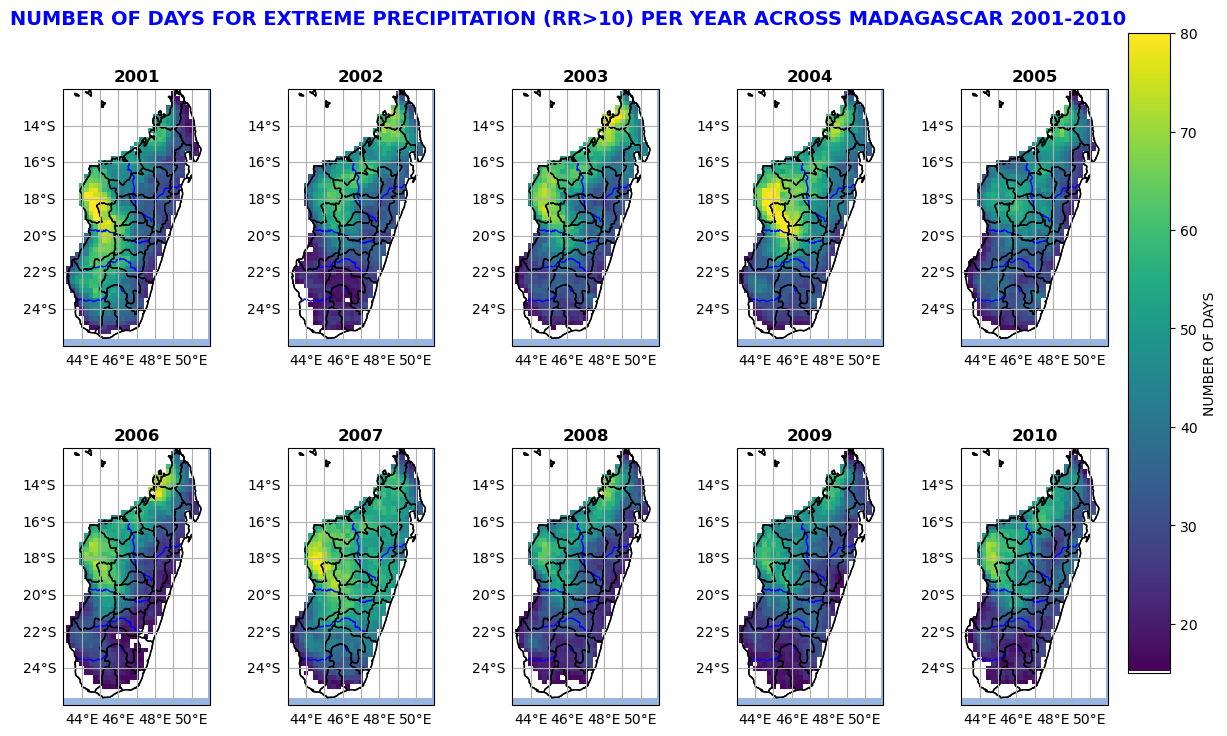

In [446]:
#------------------ANNUAL SPATIAL (RR>10)------------
#selecting precipitation >10mm
Annual_extreme_RR= da_Madagascar.where(da_Madagascar >10)
Annual_extreme_RR
Annual_extreme=Annual_extreme_RR.groupby('datetime.year').count('datetime')

fig, axes = plt.subplots(2,5,figsize=(14, 8), subplot_kw={'projection': ccrs.PlateCarree()})
ax = axes.flatten()
for i, v in enumerate(ax):
     #ADDING FEATURES
    ax[i].coastlines(resolution='10m')
    ax[i].add_feature(cf.BORDERS)
    ax[i].add_feature(cf.LAND)
    ax[i].add_feature(cf.RIVERS, color='b')
    ax[i].add_feature(cf.STATES)
    ax[i].add_feature(cf.OCEAN)
    ax[i].set_title(Year[i], fontweight='bold')
    ax[i].set_extent ([43,51,-12,-26])
    cs = ax[i].pcolormesh(Annual_extreme['lon'],Annual_extreme['lat'], Annual_extreme[i], cmap=new_map, vmax=80,vmin=15)
    grid=ax[i].gridlines()
    grid.xlabels_bottom=True; grid.ylabels_left=True;
    grid.xformatter=LONGITUDE_FORMATTER
    grid.yformatter=LATITUDE_FORMATTER
    plt.subplots_adjust(wspace=0.2,hspace=0.4)
    fig.suptitle('NUMBER OF DAYS FOR EXTREME PRECIPITATION (RR>10) PER YEAR ACROSS MADAGASCAR 2001-2010', fontsize=14, color='b',fontweight='bold')
cbar = fig.add_axes([0.9, 0.15, 0.03, 0.8])
fig.colorbar(cs,cax=cbar, orientation='vertical',label='NUMBER OF DAYS')
plt.savefig('4g.png')

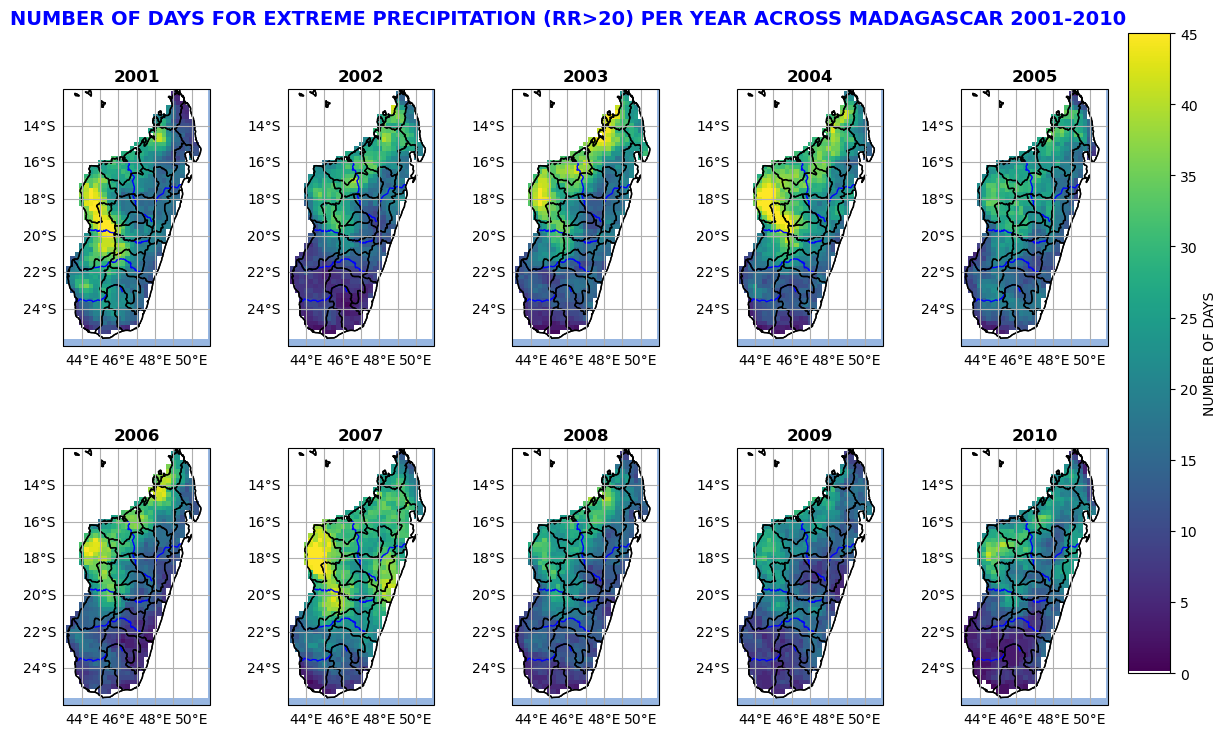

In [447]:
#-----------SPATIAL PLOTS FOR RR>20-------------------
#selecting precipitation >20mm
Annual_wet_RR= da_Madagascar.where(da_Madagascar >20)
Annual_wet_RR
# GROUPING data in years
Annual_wet=Annual_wet_RR.groupby('datetime.year').count('datetime')

fig, axes = plt.subplots(2,5,figsize=(14, 8), subplot_kw={'projection': ccrs.PlateCarree()})
ax = axes.flatten()
for i, v in enumerate(ax):
     #ADDING FEATURES
    ax[i].coastlines(resolution='10m')
    ax[i].add_feature(cf.BORDERS)
    ax[i].add_feature(cf.LAND)
    ax[i].add_feature(cf.RIVERS, color='b')
    ax[i].add_feature(cf.STATES)
    ax[i].add_feature(cf.OCEAN)
    ax[i].set_title(Year[i], fontweight='bold')
    ax[i].set_extent ([43,51,-12,-26])
    cs = ax[i].pcolormesh(Annual_wet['lon'], Annual_wet['lat'], Annual_wet[i], cmap=new_map, vmax=45,vmin=0)
    grid=ax[i].gridlines()
    grid.xlabels_bottom=True; grid.ylabels_left=True;
    grid.xformatter=LONGITUDE_FORMATTER
    grid.yformatter=LATITUDE_FORMATTER
    plt.subplots_adjust(wspace=0.2,hspace=0.4)
    fig.suptitle('NUMBER OF DAYS FOR EXTREME PRECIPITATION (RR>20) PER YEAR ACROSS MADAGASCAR 2001-2010', fontsize=14, color='b',fontweight='bold')

cbar = fig.add_axes([0.9, 0.15, 0.03, 0.8])
fig.colorbar(cs,cax=cbar, orientation='vertical',label='NUMBER OF DAYS')
plt.savefig('4h.png')